# Idea for Algorithm
* given a polygonal boundary, find some way to "evenly" space those points around the interior of the polygon
* idea: use a physics based simulation, with random initialization, to push these points to the right place using repelling constraints
* not actually working yet, many bugs

In [1]:
%load_ext autoreload
%autoreload 2


In [46]:
from shapely import Polygon, Point
from shapely.ops import nearest_points
import numpy as np
from shapely import plotting
import matplotlib.pyplot as plt
from PIL import Image
import io
from IPython.display import display
from IPython.display import Image as IPythonImage


from point_system import PointSystem, PhysicsPoint

In [6]:
plt.ioff()

In [117]:
coords = ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0))
polygon = Polygon(coords)
road_points = [
    PhysicsPoint(x, np.array([0.0, 0.0]), "road") for x in np.random.rand(10, 2)
]
system = PointSystem(road_points)

systems = [system]
for i in range(100):

    forces = []
    for i, point in enumerate(system.points):
        nearest_boundary_point = nearest_points(polygon.boundary, Point(*point.pos))[0]

        nearest_boundary_point = np.array(
            [nearest_boundary_point.x, nearest_boundary_point.y]
        )
        direction = point.pos - nearest_boundary_point
        # print(point.pos, direction, nearest_boundary_point)
        repulse_force = direction / np.linalg.norm(direction) ** 3

        # other_points = [x for j, x in enumerate(system.points) if i != j]
        # directions = [x.pos - point.pos for x in other_points]
        # forces = [d / np.linalg.norm(d)**3 for d in directions]
        # force = sum(forces) + repulse_force
        force = repulse_force
        if np.linalg.norm(force) > 1:
            force = force / np.linalg.norm(force) * 1
        forces.append(force)

    system = system.step(0.01, forces)
    systems.append(system)

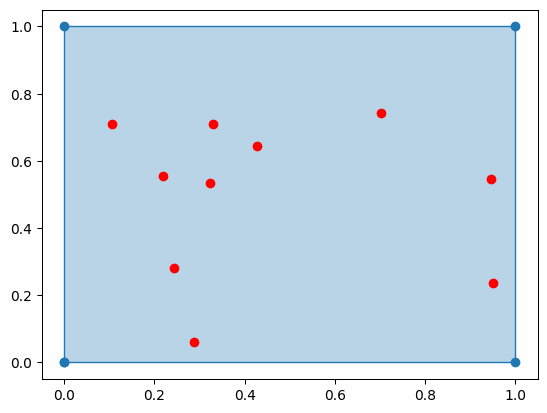

In [ ]:
def fig_to_image(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    img = Image.open(buf)
    return img


imgs = []
for system in systems:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plotting.plot_polygon(polygon, ax=ax)
    plotting.plot_points([Point(*x.pos) for x in system.points], ax=ax, color="red")
    img = fig_to_image(fig)
    imgs.append(img)

buf = io.BytesIO()
imgs[0].save(
    buf, format="GIF", save_all=True, append_images=imgs[1:], duration=200, loop=0
)
buf.seek(0)

display(IPythonImage(data=buf.getvalue()))